# NIH Data Analysis
## $\color{grey}{\text{Author: Gaurav Anand}}$

### Loading libraries

In [23]:
import pandas as pd
import json

This Notebook deals with the analysis of the survey data generated in the previous notebook given <a href="./DataWrangling.ipynb">here </a>  . If you have not already generated the data, you can run the cell block below to initialize the data and prepare the csv files. The survey questions and details can be found <a href="https://www.nlm.nih.gov/dr2/COPE_Survey_NIH_All_of_Us_Clean_4.27.20.pdf"> here. </a> <br>

In [25]:
!python3 ../code/data_generator.py  

Generated demographics...
Generated missing values (20% of data)...
Merged dataframes...
Outputed results to '../data/survey.csv'...
Done!


**Input type:** <br>

<div class="alert alert-block alert-warning">
    <b>Example data: </b><br>
    
| UserID 	| Demographics 	| ... 	| QuestionID 	| ... 	|
|--------	|--------------	|-----	|------------	|-----	|
|  *user 1*      	| *data*        	| ... 	| *answer*        	| ... 	|
| ...     	| ...          	| ... 	| ...        	| ... 	|

    
<b>The three components of the dataframe are the UserID, the demographics, and the questionIDs.</b>
</div>

The userID uniquely (and anonymously) identifies the survey taker, the demographics allows us to identify patterns between regions, races, ages, etc. and finally the questionIDs uniquely identify the questions involved in the survey (possibly stored in a database of some kind). In our case, the user IDs and the demographics are stored in `../data/survey.csv` and the question IDs, their corresponding questions and the answers to the questions are all stored in `../data/ques_ans_clean.json`.


The data can be seen below:

In [22]:
survey = pd.read_csv("../data/survey.csv", converters={'answers': eval})
with open("../data/ques_ans_clean.json","r") as f:
    q_data = pd.DataFrame(json.load(f)) # all questions given
print("Example Question Bank data")
display(q_data.head())
print("Example Survey data")
display(survey.head(3))

Example Question Bank data


,qid,Display,Answer Type,answers
0,0,You can choose not to answer any question at a...,single-select,None
1,1,"In the past month, have recommendations for so...",Single-select,"[None of the days (0 days), A few days (1-2 da..."
2,2,"Thinking about your current social habits, in ...",Single-select,"[None of the days (0 days), A few days (1-2 da..."
3,3,"Thinking about your current social habits, in ...",Single-select,"[None of the days (0 days), A few days (1-2 da..."
4,4,"Thinking about your current social habits, in ...",Single-select,"[None of the days (0 days), A few days (1-2 da..."


Example Survey data


,user_id,Gender,Ethnicity,State,Age,Employment,0,1,2,3,...,169,170,171,172,173,174,175,176,177,178
0,0,Male,White,Virginia,Under 12 years old.,Military,NaN,Every day,NaN,NaN,...,Almost everyday,At least once a week,Almost everyday,NaN,NaN,Organization again myself want month. Even ont...,Never,Yes,"['Friend' 'Spouse, partner, boyfriend, girlfri...",NaN
1,1,Male,Two or more races.,North Carolina,45-54 years old.,A homemaker,NaN,A few days (1-2 days),Every day,Most days (3-4 days),...,Almost everyday,A few times a month,Never,At least once a week,['Some other aspect of your physical appearanc...,Newspaper share fish party take particular. Cl...,2 - 5 times,Not Sure,"['Co-worker' 'Parent' 'Spouse, partner, boyfri...",Dinner energy spring western others analysis c...
2,2,Male,Asian,Georgia,12-17 years old.,Employed for wages,NaN,None of the days (0 days),Most days (3-4 days),A few days (1-2 days),...,At least once a week,A few times a month,At least once a week,At least once a week,NaN,Expect oil response piece although try. Or pro...,Once,NaN,['Sibling (brother or sister)' 'Grandparent' '...,Kid inside box dream ready radio. Real compute...


**NaNs correspond to missing data values in the notebook**

### Metrics
*Assumptions:*

* Skip rate refers to the % of participants that skip a question
* Response rate refers to the % of participants that respond to a question

In [297]:
def metrics(df,by=None,metric="response"):
    if by:
        if metric=="skip":
            return (df.set_index(by).isna().sum(level=0)/len(survey)*100).T # percentage
        elif metric=="response":
            return (100-df.set_index(by).isna().sum(level=0)/len(survey)*100).T # percentage

    else:
        response_rates = len(df) - df.isnull().sum()
        met_table = pd.DataFrame(response_rates/len(df)*100,columns=["response_rate%"])
        met_table["skip_rate%"] = 100 - met_table["response_rate%"]
        return met_table
print("Skip Rate for Questions by Age ")
metrics(survey,by="Age",metric="skip")

Skip Rate for Questions by Age 


Age,Under 12 years old.,45-54 years old.,12-17 years old.,35-44 years old.,25-34 years old.,Older than 55 years,18-24 years old.
user_id,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gender,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ethnicity,0.0,0.0,0.0,0.0,0.0,0.0,0.0
State,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Employment,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
174,4.0,1.0,3.0,4.0,2.0,2.0,0.0
175,3.0,2.0,0.0,7.0,3.0,3.0,0.0
176,3.0,2.0,2.0,7.0,2.0,3.0,0.0
177,2.0,6.0,1.0,3.0,5.0,2.0,0.0


In [298]:
print("Response Rates for Questions by Age")
metrics(survey,by="Age",metric="response")

Response Rates for Questions by Age


Age,Under 12 years old.,45-54 years old.,12-17 years old.,35-44 years old.,25-34 years old.,Older than 55 years,18-24 years old.
user_id,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Gender,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Ethnicity,100.0,100.0,100.0,100.0,100.0,100.0,100.0
State,100.0,100.0,100.0,100.0,100.0,100.0,100.0
Employment,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...
174,96.0,99.0,97.0,96.0,98.0,98.0,100.0
175,97.0,98.0,100.0,93.0,97.0,97.0,100.0
176,97.0,98.0,98.0,93.0,98.0,97.0,100.0
177,98.0,94.0,99.0,97.0,95.0,98.0,100.0


In [299]:
print("Skip rates and response rates for all questions and demographic information")
metrics(survey)

Skip rates and response rates for all questions and demographic information


,response_rate%,skip_rate%
user_id,100.0,0.0
Gender,100.0,0.0
Ethnicity,100.0,0.0
State,100.0,0.0
Age,100.0,0.0
...,...,...
174,84.0,16.0
175,82.0,18.0
176,81.0,19.0
177,81.0,19.0


### Demographic Analysis

As an example of a demographic analysis, we took the question, *"Do you personally know someone who has died of COVID-19?"* and analyzed the various generated responses with respect to certain demographic variables.

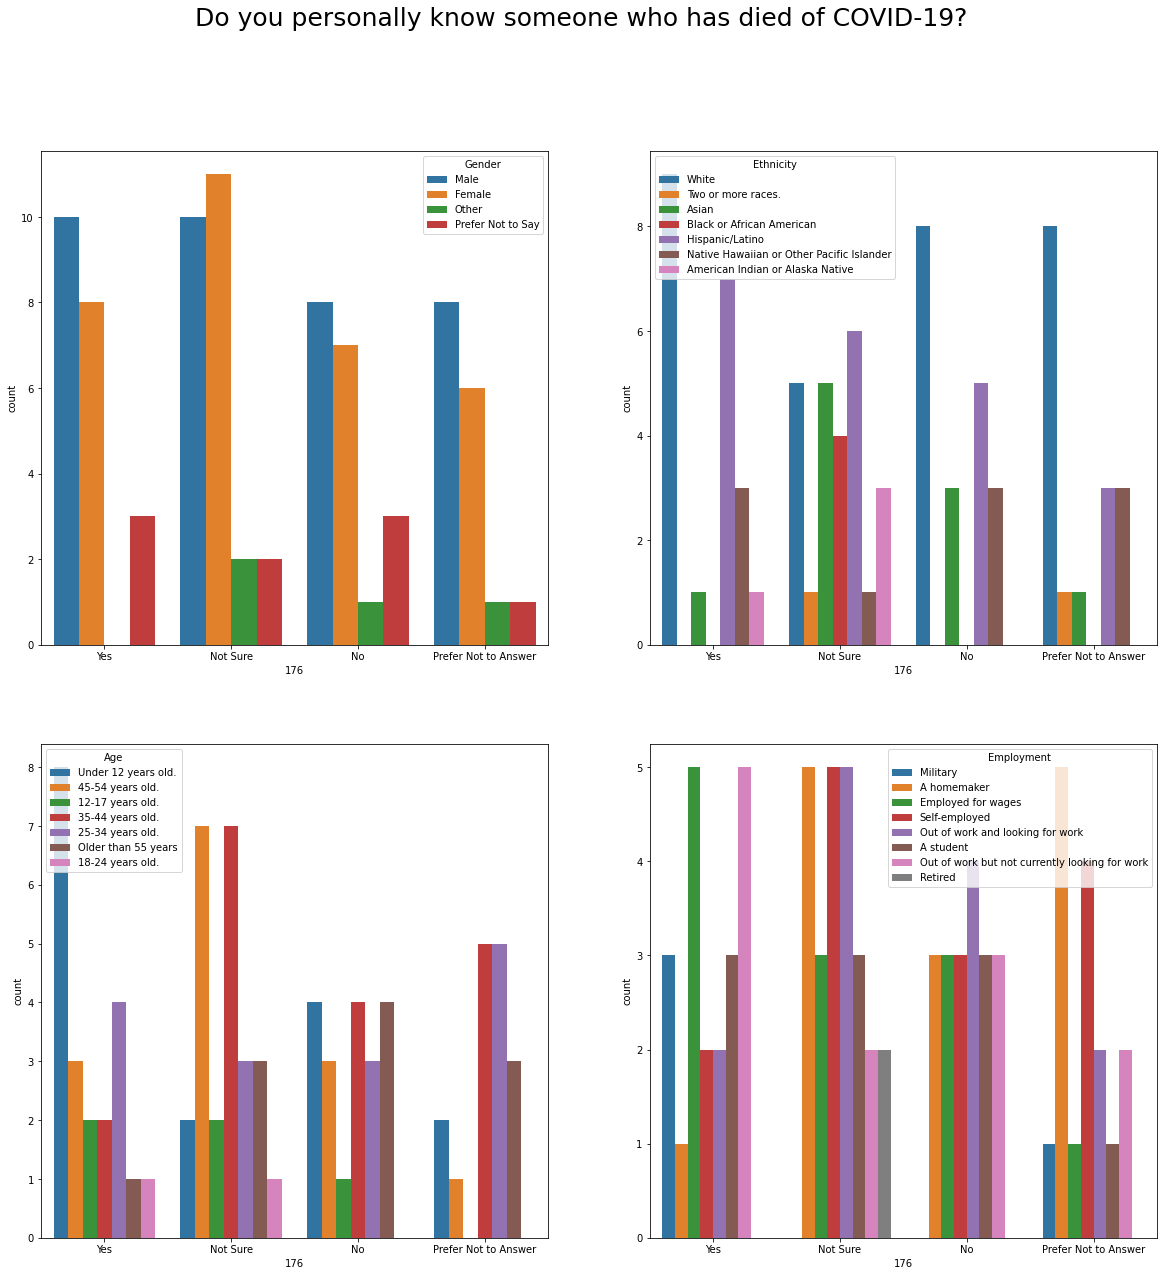

In [216]:
import seaborn as sns
from matplotlib import pyplot as plt


def demog_count(column,figsize = (20,20)):
    '''
    returns countplots for categorical variables (or answers to questions) for each demographic variables
    '''
    plt.subplots(2,2,figsize= figsize)
    plt.suptitle(f"{q_data.iloc[int(column)].Display}",fontsize=25)
    plt.subplot(2,2,1)
    sns.countplot(x=column,hue="Gender",data=survey)
    plt.subplot(2,2,2)
    sns.countplot(x=column,hue="Ethnicity",data=survey)
    plt.subplot(2,2,3)
    sns.countplot(x=column,hue="Age",data=survey)
    plt.subplot(2,2,4)
    sns.countplot(x=column,hue="Employment",data=survey)
    plt.show()

demog_count("176") # question ID 176 - Do you personally know someone who has died of COVID-19? 

Some conclusions that we **may** be draw from the figures above (after appropriate statistical testing) are:
* The number of people who are under age 12 that know family members that have died of COVID-19 is much higher than people of other age groups.
* The number of males and females responders is disproportionately larger than the number of 'Other' or 'Prefer not to say' responders.
* A large proportion of Asian survey responders were not sure whether they knew someone that was personally affected by COVID-19

### Text Analysis
One of the questions, "*What do you think is the main reason for these experiences?*", asked in <quote> Section 16: Discrimination </quote> requested an optional text response for *Other reasons - please specify*. As part of the data generation challenge, I was able to generate fake text for the text response questions. The text analysis below can help identify the most commonly used words in the responses.

In [211]:
from collections import Counter 
def text_analysis(column):
    '''
    Generates the top 10 most common words in all of the survey data for a particular column / question id
    '''
    word_list = []
    for item_num in range(len(survey)):
        if type(survey[column][item_num]) != float:
            split = survey[column][item_num].split()
            word_list.extend(split)
    counter = Counter(word_list)
    return counter.most_common(10)
print("10 most frequently used words")
text_analysis("174")

10 most frequently used words


[('study', 7),
 ('certainly', 6),
 ('real', 6),
 ('want', 5),
 ('color', 5),
 ('series', 5),
 ('whom', 5),
 ('home', 5),
 ('also', 5),
 ('keep', 5)]

While this text data was generated randomly, in a real survey this would highlight responses that were most concerning to survey responders. If given more time, I would flesh out this function in much more depth and generate even better insights into the text responses, perhaps even using NLP (if there were enough text responses to validate the use of this technology).

## Time Constraints
A major factor in the lack of detailed analysis in this report was the lack of time available before the deadline. If I were given a little more time, some changes that I would make are,
* A section-by-section breakdown of questions and associated metrics
* In-depth documentation
* Support for response frequency distributions